### model 2 - Less Parameters

#### Target:
1. Same Skeleton as model 1
2. Make the model lighter by reducing the number of channels 

#### Results:
Total parameters: 14,760
Best Training Accuracy - 98.53 at the 15th Epoch
Best Testing Accuracy - 98.55 at the 10th epoch

#### Analysis:
1. Good model, the train and test accuracys are overlapping at a few places. 
2. Train and test discrepancy is less, average is around 0.2 but not consistent and is around 0.3 at the last epoch, so its still overfitting but not as model1
3. The model is capable and can still be pushed to work with lesser parameters

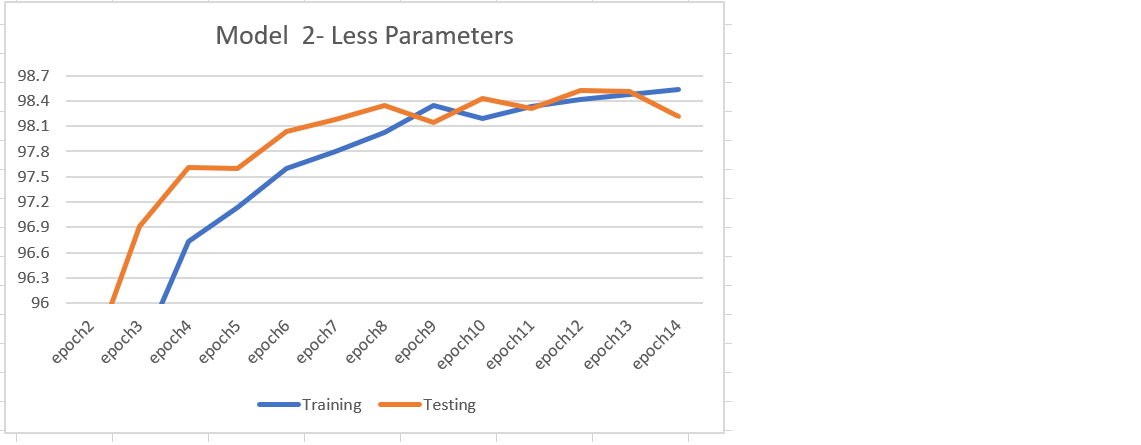

## Import Libraries

In [1]:
from __future__ import print_function
import torch
# import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from utils import train_test_dataloader
import models
from models import model_summary, train, test, plot_accuracy_loss, model2

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [2]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)


# Train data transformations
train_transformer = [transforms.RandomRotation((-7., 7.), fill=0),transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,)),]

# Test Phase transformations
test_transformer = [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train and test dataloader
train_loader,test_loader = train_test_dataloader(train_transformer, test_transformer, dataloader_args)

CUDA Available? True
Device:  cuda


100%|██████████| 9912422/9912422 [00:00<00:00, 304514807.95it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30721707.79it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 145291836.06it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 16888766.64it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [3]:
# sending model to device
model = model2().to(device)

# Generating model summary
model_summary(model,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             144
              ReLU-2           [-1, 16, 28, 28]               0
            Conv2d-3           [-1, 20, 28, 28]           2,880
              ReLU-4           [-1, 20, 28, 28]               0
         MaxPool2d-5           [-1, 20, 14, 14]               0
            Conv2d-6           [-1, 10, 14, 14]             200
              ReLU-7           [-1, 10, 14, 14]               0
            Conv2d-8           [-1, 12, 12, 12]           1,080
              ReLU-9           [-1, 12, 12, 12]               0
           Conv2d-10           [-1, 16, 10, 10]           1,728
             ReLU-11           [-1, 16, 10, 10]               0
           Conv2d-12           [-1, 10, 10, 10]             160
             ReLU-13           [-1, 10, 10, 10]               0
           Conv2d-14             [-1, 1

# Training and Testing

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs.

Let's write train and test functions

# Let's Train and test our model

In [4]:
model =  model2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=2.3019230365753174 Batch_id=468 Accuracy=20.59: 100%|██████████| 469/469 [00:21<00:00, 21.45it/s]



Test set: Average loss: 2.3021, Accuracy: 1474/10000 (14.74%)

EPOCH: 1


Loss=0.23514004051685333 Batch_id=468 Accuracy=61.99: 100%|██████████| 469/469 [00:21<00:00, 22.10it/s]



Test set: Average loss: 0.1636, Accuracy: 9530/10000 (95.30%)

EPOCH: 2


Loss=0.11175689101219177 Batch_id=468 Accuracy=95.38: 100%|██████████| 469/469 [00:21<00:00, 22.18it/s]



Test set: Average loss: 0.0966, Accuracy: 9691/10000 (96.91%)

EPOCH: 3


Loss=0.04269808158278465 Batch_id=468 Accuracy=96.73: 100%|██████████| 469/469 [00:21<00:00, 21.49it/s]



Test set: Average loss: 0.0737, Accuracy: 9761/10000 (97.61%)

EPOCH: 4


Loss=0.10844384878873825 Batch_id=468 Accuracy=97.13: 100%|██████████| 469/469 [00:22<00:00, 21.09it/s]



Test set: Average loss: 0.0780, Accuracy: 9760/10000 (97.60%)

EPOCH: 5


Loss=0.08093618601560593 Batch_id=468 Accuracy=97.53: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]



Test set: Average loss: 0.0610, Accuracy: 9804/10000 (98.04%)

EPOCH: 6


Loss=0.1353602111339569 Batch_id=468 Accuracy=97.80: 100%|██████████| 469/469 [00:22<00:00, 20.81it/s]



Test set: Average loss: 0.0562, Accuracy: 9818/10000 (98.18%)

EPOCH: 7


Loss=0.05819332227110863 Batch_id=468 Accuracy=98.02: 100%|██████████| 469/469 [00:20<00:00, 22.37it/s]



Test set: Average loss: 0.0527, Accuracy: 9835/10000 (98.35%)

EPOCH: 8


Loss=0.0240673515945673 Batch_id=468 Accuracy=98.10: 100%|██████████| 469/469 [00:20<00:00, 22.51it/s]



Test set: Average loss: 0.0552, Accuracy: 9815/10000 (98.15%)

EPOCH: 9


Loss=0.005775792524218559 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:21<00:00, 21.77it/s]



Test set: Average loss: 0.0504, Accuracy: 9843/10000 (98.43%)

EPOCH: 10


Loss=0.03275437280535698 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:22<00:00, 20.41it/s]



Test set: Average loss: 0.0454, Accuracy: 9855/10000 (98.55%)

EPOCH: 11


Loss=0.056402068585157394 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:22<00:00, 21.07it/s]



Test set: Average loss: 0.0485, Accuracy: 9831/10000 (98.31%)

EPOCH: 12


Loss=0.014169291593134403 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:21<00:00, 21.86it/s]



Test set: Average loss: 0.0439, Accuracy: 9852/10000 (98.52%)

EPOCH: 13


Loss=0.06890181452035904 Batch_id=468 Accuracy=98.48: 100%|██████████| 469/469 [00:20<00:00, 22.54it/s]



Test set: Average loss: 0.0456, Accuracy: 9851/10000 (98.51%)

EPOCH: 14


Loss=0.019607242196798325 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:21<00:00, 22.25it/s]



Test set: Average loss: 0.0553, Accuracy: 9821/10000 (98.21%)



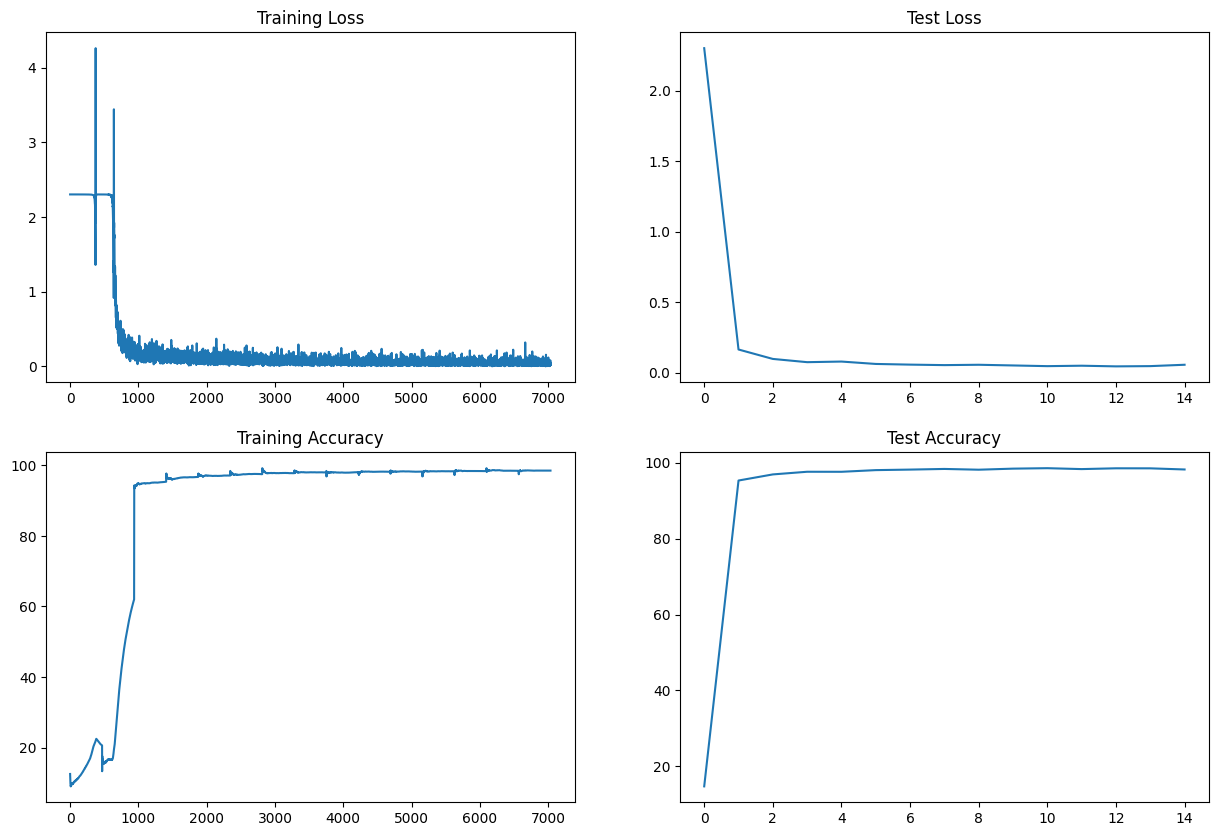

In [7]:
plot_accuracy_loss()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


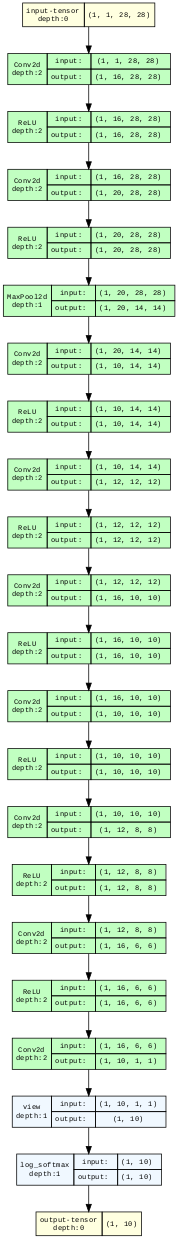

In [6]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(model2(), input_size=(1,1,28,28), expand_nested=False)
model_graph.visual_graph